In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

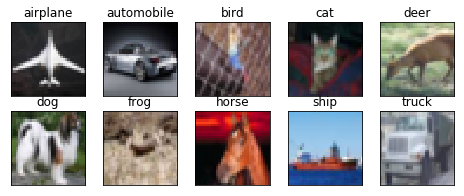

In [10]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
#base model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_10 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 96)        41568     
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  # This is added back by InteractiveShellApp.init_path()
W0615 09:57:48.408013 140281502394240 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.

Epoch 1/100
390/390 [==============================] - 13s 33ms/step - loss: 1.8724 - acc: 0.2862 - val_loss: 1.4618 - val_acc: 0.4592
Epoch 2/100
390/390 [==============================] - 9s 23ms/step - loss: 1.3629 - acc: 0.5058 - val_loss: 1.1557 - val_acc: 0.5849
Epoch 3/100
390/390 [==============================] - 9s 23ms/step - loss: 1.1443 - acc: 0.5922 - val_loss: 0.9767 - val_acc: 0.6456
Epoch 4/100
390/390 [==============================] - 9s 23ms/step - loss: 1.0081 - acc: 0.6455 - val_loss: 0.9277 - val_acc: 0.6798
Epoch 5/100
390/390 [==============================] - 9s 23ms/step - loss: 0.9198 - acc: 0.6805 - val_loss: 0.8278 - val_acc: 0.7113
Epoch 6/100
390/390 [==============================] - 9s 23ms/step - loss: 0.8418 - acc: 0.7092 - val_loss: 0.7968 - val_acc: 0.7308
Epoch 7/100
390/390 [==============================] - 9s 23ms/step - loss: 0.7751 - acc: 0.7319 - val_loss: 0.7706 - val_acc: 0.7339
Epoch 8/100
390/390 [==============================] - 9s 23m

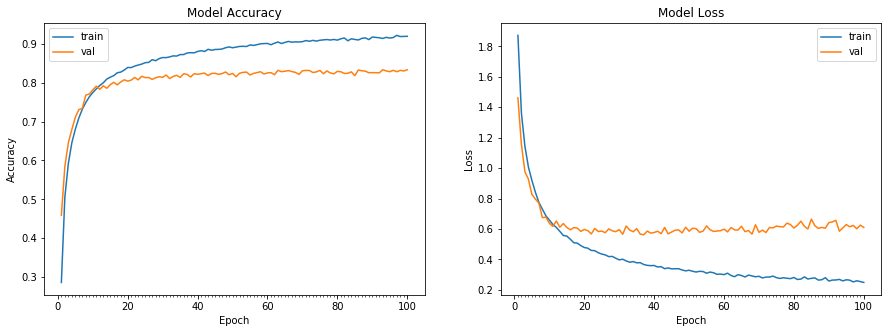

Accuracy on test data is: 83.33


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

###redefined model


In [80]:
from keras.layers import Input
from keras.layers import concatenate
from keras.layers import SeparableConv2D
from keras.models import Model
# Define the model
inputs = Input(shape=(32, 32, 3))
layer_1 = Convolution2D(32, (3,3), border_mode='same')(inputs) #32x32x32
activation_layer_1 = Activation('relu')(layer_1)
bn_1 = BatchNormalization()(activation_layer_1)


layer_2 = Convolution2D(32, (3,1), border_mode = 'same')(bn_1) #32x32
activation_layer_2 = Activation('relu')(layer_2)
bn2 = BatchNormalization()(activation_layer_2)


layer_3 = Convolution2D(32, (1,3), border_mode = 'same')(bn2) #32x32x32
activation_layer_3 = Activation('relu')(layer_3)
bn3 = BatchNormalization()(activation_layer_3)

concat_layer = concatenate([bn_1, bn2, bn3]) #32x32x96

layer_4 = SeparableConv2D(128, (3,3))(concat_layer)  #30x30x128
activation_layer_4 = Activation('relu')(layer_4)
bn4 = BatchNormalization()(activation_layer_4)

layer_5 = Convolution2D(64, (3,3))(bn4) #28x28
activation_layer_5 = Activation('relu')(layer_5)
bn5 = BatchNormalization()(activation_layer_5)

layer_6 = Convolution2D(64, (3,3))(bn5) #26x26
activation_layer_6 = Activation('relu')(layer_6)
bn6 = BatchNormalization()(activation_layer_6)

max_pool = MaxPooling2D(pool_size=(2,2))(bn6) #13x13

layer_7 = SeparableConv2D(64, (3,3), padding='same')(max_pool)  #13x13
activation_layer_7 = Activation('relu')(layer_7)
bn7 = BatchNormalization()(activation_layer_7)

layer_8 = Convolution2D(64, (3,3), padding='same')(bn7) #13x13x64
activation_layer_8 = Activation('relu')(layer_8)
bn8 = BatchNormalization()(activation_layer_8)

concat_layer2 = concatenate([bn7, bn8]) #13x13


layer_9 = Convolution2D(64, (3,3))(concat_layer2) #11x11x64
activation_layer_9 = Activation('relu')(layer_9)
bn9 = BatchNormalization()(activation_layer_9)

layer_10 = Convolution2D(32, (5,5), border_mode = 'same')(bn9) #11x11x32
activation_layer_10 = Activation('relu')(layer_10)
bn10 = BatchNormalization()(activation_layer_10)

layer_11 = Convolution2D(32, (3,3), border_mode = 'same')(bn10) #11x11x32
activation_layer_11 = Activation('relu')(layer_11)
bn11 = BatchNormalization()(activation_layer_11)


concat_layer3 = concatenate([layer_10, layer_11]) #11x11

layer_12 = Convolution2D(32, (3,3))(concat_layer3) #9x9
activation_layer_12 = Activation('relu')(layer_12)
bn12 = BatchNormalization()(activation_layer_12)

layer_13 = Convolution2D(32, (3,3), dilation_rate = 1, padding = 'same')(layer_12) #9x9
activation_layer_13 = Activation('relu')(layer_13)
bn13 = BatchNormalization()(activation_layer_13)

layer_14 = Convolution2D(32, (3,3), dilation_rate= 2, padding = 'same')(layer_13) #9x9
activation_layer_14 = Activation('relu')(layer_14)
bn14 = BatchNormalization()(activation_layer_14)

concat_layer4 = concatenate([layer_13, layer_14]) #7x7
bn15 = BatchNormalization()(concat_layer)

layer_15 = Convolution2D(10, (3,3))(concat_layer4)  #7x7
activation_layer_15 = Activation('relu')(layer_15)
bn16 = BatchNormalization()(activation_layer_15)

layer_16 = Convolution2D(10, (3,3))(layer_15) # 5x5
activation_layer_16 = Activation('relu')(layer_16)
bn17 = BatchNormalization()(activation_layer_16)

layer_17 = Convolution2D(10, (5,5))(bn17) #1x1
activation_layer_17 = Activation('relu')(layer_17)


prediction_layer = Flatten()(layer_17)
activation_18 = Activation('softmax')(prediction_layer)

model = Model(inputs=inputs, outputs = activation_18)







print(num_classes)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 1), padding="same")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same")`


10


In [81]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_46 (InputLayer)           (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_521 (Conv2D)             (None, 32, 32, 32)   896         input_46[0][0]                   
__________________________________________________________________________________________________
activation_239 (Activation)     (None, 32, 32, 32)   0           conv2d_521[0][0]                 
__________________________________________________________________________________________________
batch_normalization_426 (BatchN (None, 32, 32, 32)   128         activation_239[0][0]             
__________________________________________________________________________________________________
conv2d_522

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/100
390/390 [==============================] - 48s 123ms/step - loss: 1.3725 - acc: 0.5032 - val_loss: 1.2590 - val_acc: 0.5872
Epoch 2/100
390/390 [==============================] - 35s 89ms/step - loss: 0.9486 - acc: 0.6615 - val_loss: 0.9938 - val_acc: 0.6692
Epoch 3/100
390/390 [==============================] - 34s 88ms/step - loss: 0.7811 - acc: 0.7232 - val_loss: 0.9973 - val_acc: 0.6648
Epoch 4/100
390/390 [==============================] - 34s 88ms/step - loss: 0.6632 - acc: 0.7661 - val_loss: 0.7728 - val_acc: 0.7374
Epoch 5/100
390/390 [==============================] - 34s 87ms/step - loss: 0.5777 - acc: 0.7997 - val_loss: 0.6976 - val_acc: 0.7691
Epoch 6/100
390/390 [==============================] - 34s 88ms/step - loss: 0.5036 - acc: 0.8253 - val_loss: 0.8048 - val_acc: 0.7341
Epoch 7/100
390/390 [==============================] - 34s 88ms/step - loss: 0.4488 - acc: 0.8442 - val_loss: 0.7041 - val_acc: 0.7729
Epoch 8/100
390/390 [==============================] -

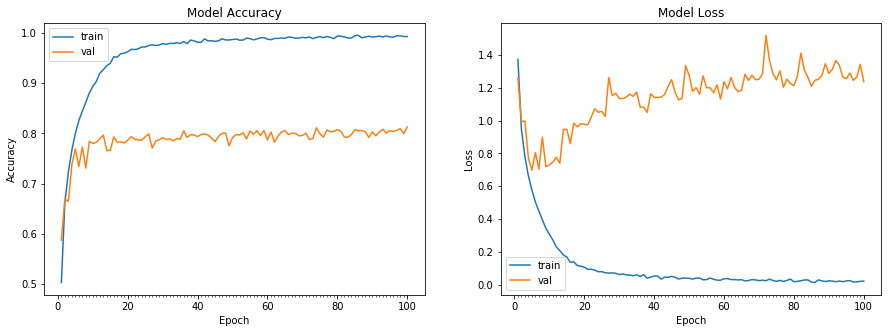

Accuracy on test data is: 81.28
Epoch 1/100
  2/390 [..............................] - ETA: 33s - loss: 0.0121 - acc: 0.9961

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`


390/390 [==============================] - 34s 87ms/step - loss: 0.0151 - acc: 0.9950 - val_loss: 1.2771 - val_acc: 0.8051
Epoch 2/100
390/390 [==============================] - 34s 87ms/step - loss: 0.0203 - acc: 0.9930 - val_loss: 1.3119 - val_acc: 0.8037
Epoch 3/100
390/390 [==============================] - 34s 87ms/step - loss: 0.0208 - acc: 0.9929 - val_loss: 1.3604 - val_acc: 0.8026
Epoch 4/100
390/390 [==============================] - 34s 87ms/step - loss: 0.0199 - acc: 0.9932 - val_loss: 1.2663 - val_acc: 0.8132
Epoch 5/100
390/390 [==============================] - 34s 87ms/step - loss: 0.0175 - acc: 0.9943 - val_loss: 1.3119 - val_acc: 0.8093
Epoch 6/100
390/390 [==============================] - 34s 87ms/step - loss: 0.0185 - acc: 0.9936 - val_loss: 1.3378 - val_acc: 0.8065
Epoch 7/100
390/390 [==============================] - 34s 87ms/step - loss: 0.0177 - acc: 0.9941 - val_loss: 1.2050 - val_acc: 0.8103
Epoch 8/100
390/390 [==============================] - 34s 87ms/ste

KeyboardInterrupt: ignored

In [82]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)



```
# This is formatted as code
```

### Model accuracy is 81.28% in the 100th epoch.
###please ignore the second training output. It was because of a another model.fit() that was written by mistake.